# CNN Concepts Explored

In this notebook, we explore the key concepts of Convolutional Neural Networks (CNNs) using our Banana Ripeness Classification model. We will examine Convolution, Pooling, Activation Functions, and Optimization.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import glob

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.model import create_banana_cnn

print("TensorFlow Version:", tf.__version__)

2025-12-06 21:55:47.139455: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-06 21:55:47.139693: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-06 21:55:47.171815: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-06 21:55:48.237961: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

TensorFlow Version: 2.20.0


In [2]:
# Create the model
model = create_banana_cnn()
model.summary()

/home/atg/LearnCoding/Projects/Data Science/Projects/Banana-Prediction-CNN/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-06 21:55:48.997666: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,594,756 (21.34 MB)

 Trainable params: 5,594,756 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

## 1. Convolution

Convolutional layers are the core building blocks of a CNN. They apply a set of learnable filters (kernels) to the input. Each filter scans through the input image (or feature map) and performs a dot product between its weights and the input values it covers. This operation produces a **feature map** that highlights specific features like edges, textures, or shapes detected by the filter.

In our model, the first layer is `Conv2D(32, (3, 3), activation='relu')`. This means:
- **32 Filters**: The layer learns 32 different features.
- **(3, 3) Kernel Size**: Each filter is a 3x3 matrix.
- **ReLU Activation**: A Rectified Linear Unit function is applied to the output.

Filter shape: (3, 3, 3, 32)


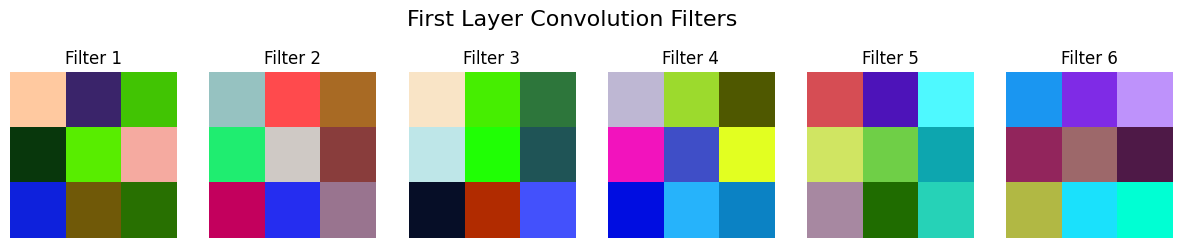

In [ ]:
# Visualize Filters from the first Conv layer
layer = model.layers[0] # Conv2D
filters, biases = layer.get_weights()
print("Filter shape:", filters.shape) 

# Plot first 6 filters
n_filters = 6
fig, axes = plt.subplots(1, n_filters, figsize=(15, 3))
for i in range(n_filters):
    f = filters[:, :, :, i]
    # Normalize for visualization
    f = (f - f.min()) / (f.max() - f.min())
    axes[i].imshow(f, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i+1}')
plt.suptitle('First Layer Convolution Filters', fontsize=16)
plt.show()

Loading image: ../data/test/ripe/musa-acuminata-freshripe-7a134876-1d0a-11ec-b9d9-d8c4975e38aa_jpg.rf.f5d96561231a4533abce6bda8219db3f.jpg


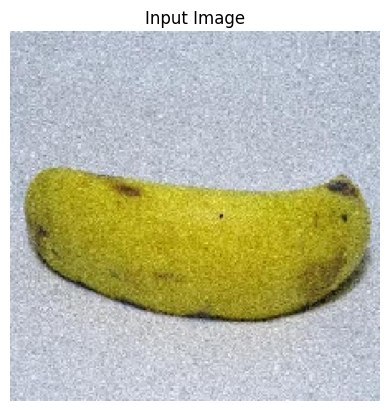

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


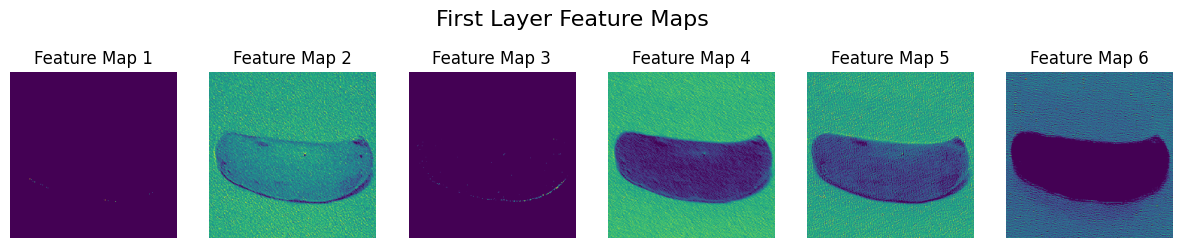

In [ ]:
# Load a sample image to visualize feature maps
image_paths = glob.glob('../data/test/*/*.jpg') + glob.glob('../data/test/*/*.png')

if image_paths:
    img_path = image_paths[0]
    print(f"Loading image: {img_path}")
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()
    
    # Create a model that outputs the first conv layer's activation
    activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer.output)
    activations = activation_model.predict(img_tensor)
    
    # Plot feature maps
    fig, axes = plt.subplots(1, n_filters, figsize=(15, 3))
    for i in range(n_filters):
        f_map = activations[0, :, :, i]
        axes[i].imshow(f_map, cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Feature Map {i+1}')
    plt.suptitle('First Layer Feature Maps', fontsize=16)
    plt.show();
else:
    print("No images found in ../data/test for visualization.")

## 2. Pooling

Pooling layers are used to reduce the spatial dimensions (height and width) of the feature maps, thereby reducing the number of parameters and computation in the network. It also helps in making the detection of features somewhat invariant to scale and orientation changes.

In our model, we use `MaxPooling2D((2, 2))`. This operation takes the maximum value over a 2x2 window, effectively halving the height and width of the input.

In [5]:
# Explain Max Pooling by showing shapes
conv_output_shape = model.layers[0].output.shape
pool_output_shape = model.layers[1].output.shape

print(f"Output shape after Convolution: {conv_output_shape}")
print(f"Output shape after Max Pooling: {pool_output_shape}")
print("\nNotice how the spatial dimensions (height and width) are halved.")

Output shape after Convolution: (None, 222, 222, 32)
Output shape after Max Pooling: (None, 111, 111, 32)

Notice how the spatial dimensions (height and width) are halved.


## 3. Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns. Without them, the network would just be a linear regression model.

### ReLU (Rectified Linear Unit)
It is the most common activation function in CNNs. It outputs the input directly if it is positive, otherwise, it outputs zero.

`f(x) = max(0, x)`

### Softmax
Used in the final output layer for multi-class classification. It normalizes the output vector into a probability distribution over predicted output classes.

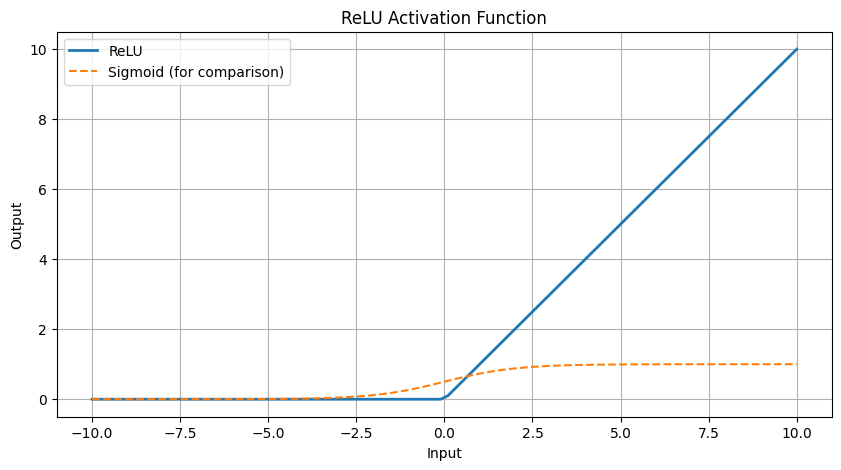

In our model, ReLU is used in Convolutional and Dense layers to introduce non-linearity.
Softmax is used in the final layer to produce probability scores for the 4 classes.


In [ ]:
# Visualizing ReLU
x = np.linspace(-10, 10, 100)
y_relu = np.maximum(0, x)
y_sigmoid = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10, 5))
plt.plot(x, y_relu, label='ReLU', linewidth=2)
plt.plot(x, y_sigmoid, label='Sigmoid (for comparison)', linestyle='--')
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

print("In our model, ReLU is used in Convolutional and Dense layers to introduce non-linearity.")
print("Softmax is used in the final layer to produce probability scores for the 4 classes.")

## 4. Optimization

Optimization algorithms are used to update the network's weights and biases to minimize the loss function.

### Adam Optimizer
We use the **Adam** (Adaptive Moment Estimation) optimizer. It is an adaptive learning rate optimization algorithm that's designed specifically for training deep neural networks. It combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.

### Categorical Crossentropy Loss
Since this is a multi-class classification problem (4 classes of banana ripeness), we use **Categorical Crossentropy** as the loss function. It measures the dissimilarity between the true label distribution and the predicted label distribution.

In [7]:
print(" Optimizer: Adam")
print("- Adaptive Moment Estimation.")
print("- Efficient and requires little memory.")
print("\n Loss Function: Categorical Crossentropy")
print("- Used for multi-class classification tasks.")
print("- Measures the divergence between predicted probabilities and actual class labels.")

 Optimizer: Adam
- Adaptive Moment Estimation.
- Efficient and requires little memory.

 Loss Function: Categorical Crossentropy
- Used for multi-class classification tasks.
- Measures the divergence between predicted probabilities and actual class labels.
